In [7]:
# import library and load dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# load dataset
data = pd.read_csv('data.csv', delimiter=';')

# preprocess

# check if there is missing value
data.isnull().sum()

# encoding categorical variable
# Dropout -> 0, Enrolled -> 1, Graduate -> 1
data['Target'] = data['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 1})

# form features and target
X = data.drop(['Target'], axis=1)
y = data['Target']

# change column name Nacionality to Nationality
X.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

# change Nationality value 1 to 1, all other to 0
X['Nationality'] = X['Nationality'].apply(lambda x: 1 if x == 1 else 0)

# drop Gender column to avoid discrimination
X = X.drop(['Gender'], axis=1)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split dataset
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

k=2, score=0.9512136272379389
k=3, score=0.7629524234300671
k=4, score=0.7082685136974273
k=5, score=0.6909719240936121
k=6, score=0.5774976590455869
k=7, score=0.5470192874975149
k=8, score=0.5087364804579165
k=9, score=0.5606201349389004
k=10, score=0.5369484592510761


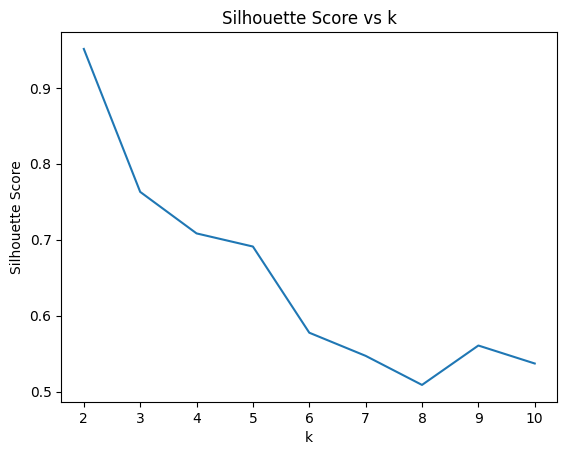

In [16]:
# search for the best k value for KMeans clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    print(f'k={k}, score={score}')
    scores.append(score)

#plot the scores
import matplotlib.pyplot as plt
plt.plot(np.arange(2, 11), scores)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()


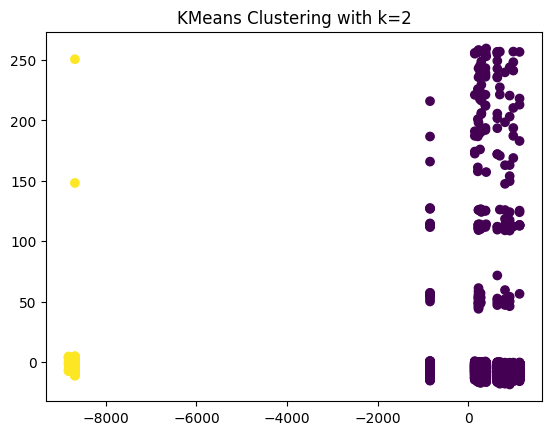

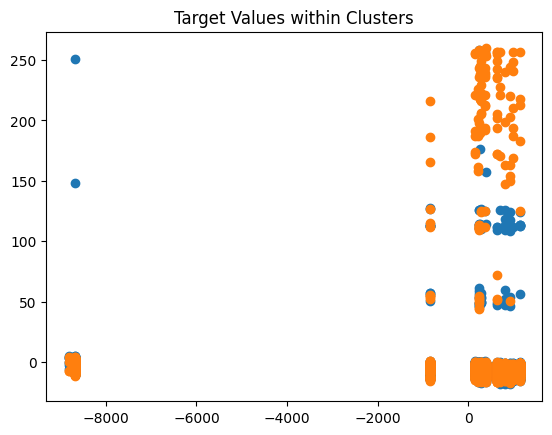

In [17]:
# draw the scatter plot of the data

pca = PCA(n_components=2)
X_scatter = pca.fit_transform(X)

best_k = 2

kmeans = KMeans(n_clusters=best_k)
kmeans.fit(X_scatter)

plt.scatter(X_scatter[:, 0], X_scatter[:, 1], c=kmeans.labels_)
plt.title(f"KMeans Clustering with k={best_k}")
plt.show()

# visualize y values with different colors based on cluster
for i in range(3):
    plt.scatter(X_scatter[y == i, 0], X_scatter[y == i, 1], label=i)
plt.title('Target Values within Clusters')
plt.show()



k=2, score=0.9512136272379389
k=3, score=0.6260864859645816
k=4, score=0.7082685136974273
k=5, score=0.6617933771858997
k=6, score=0.671170159030534
k=7, score=0.5853563923829532
k=8, score=0.5857252528078728
k=9, score=0.6019265875578256
k=10, score=0.5443354540031836


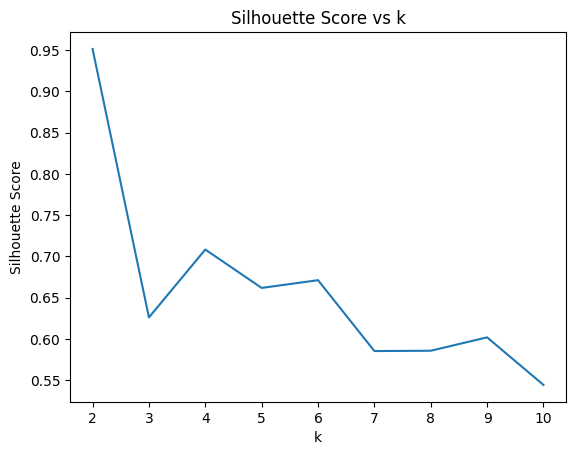

In [18]:
# use Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering

scores = []
for k in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit(X_train)
    score = silhouette_score(X_train, agg.labels_)
    print(f'k={k}, score={score}')
    scores.append(score)

#plot the scores
plt.plot(np.arange(2, 11), scores)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()

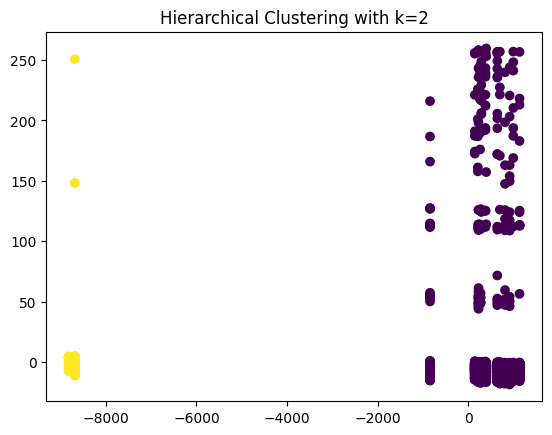

Text(0.5, 1.0, 'Target Values within Clusters')

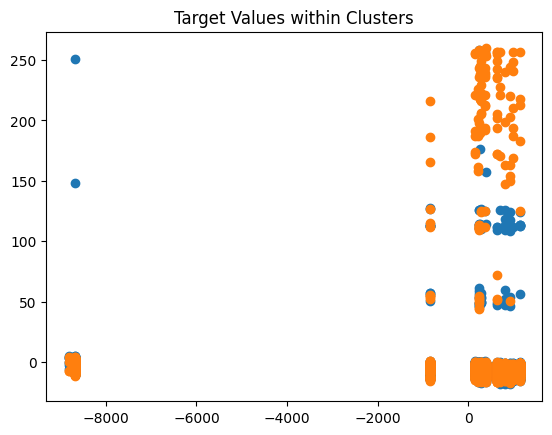

In [19]:
# draw the scatter plot of the data

best_k = 2

agg = AgglomerativeClustering(n_clusters=best_k)
agg.fit(X_scatter)

plt.scatter(X_scatter[:, 0], X_scatter[:, 1], c=agg.labels_)
plt.title(f"Hierarchical Clustering with k={best_k}")
plt.show()

# visualize y values with different colors based on cluster

for i in range(3):
    plt.scatter(X_scatter[y == i, 0], X_scatter[y == i, 1], label=i)
plt.title('Target Values within Clusters')


This shows that the target value can not be effectively seperated by clustering. Thus clustering is not an appropriate way to seperate the target value based on X values, at least not in a naive way.